In [2]:
import pg8000
conn = pg8000.connect(host="training.c1erymiua9dx.us-east-1.rds.amazonaws.com", port=5432, database="training", user="dot_student", password="qgis")

In [3]:
cursor = conn.cursor()
statement = "select * from INFORMATION_SCHEMA.COLUMNS where table_name = 'dot_311'"
cursor.execute(statement)

In [4]:
conn.rollback()

In [5]:
cursor = conn.cursor() 
statement= "SELECT * from INFORMATION_SCHEMA.COLUMNs where table_name='dot_311'" 
cursor.execute(statement) 
columns=[] 
for row in cursor.fetchall():
    columns.append(row[3]) 
print(columns)

['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor', 'location t', 'incident z', 'incident a', 'street nam', 'cross stre', 'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city', 'landmark', 'facility t', 'status', 'due date', 'resolution', 'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina', 'park facil', 'park borou', 'school nam', 'school num', 'school reg', 'school cod', 'school pho', 'school add', 'school cit', 'school sta', 'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa', 'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2', 'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude', 'location', 'geom', 'created_date', 'closed_date']


In [6]:
import pandas as pd
import matplotlib
cursor.execute("select * from dot_311")
data = []
for items in cursor.fetchall():
    data.append(items)

In [7]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor', 'location t', 'incident z', 'incident a', 'street nam', 'cross stre', 'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city', 'landmark', 'facility t', 'status', 'due date', 'resolution', 'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina', 'park facil', 'park borou', 'school nam', 'school num', 'school reg', 'school cod', 'school pho', 'school add', 'school cit', 'school sta', 'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa', 'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2', 'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude', 'location', 'geom', 'created_date', 'closed_date']

In [8]:
#created an integrated varible for time complaint
df['Complete_time'] = df['closed_date'] - df['created_date']

In [9]:
#There are negatives numbers which will ruin our data analysis
df['Complete_time'].describe() 

count                       5650
mean      6 days 15:05:05.589380
std      14 days 12:05:38.260805
min           -19 days +09:29:00
25%              0 days 01:14:00
50%              0 days 21:48:15
75%       4 days 00:30:48.500000
max             89 days 18:54:00
Name: Complete_time, dtype: object

In [10]:
#Transforming data[Complete_time] into only positive values
raw_data = df['Complete_time'] 

In [11]:
new_data = abs(raw_data)

In [12]:
#descriptive values havent change that much in general with the changes
new_data.describe()

count                       5650
mean      7 days 08:06:25.341592
std      14 days 03:47:52.941494
min              0 days 00:00:00
25%       0 days 04:53:45.750000
50%              1 days 03:34:28
75%       4 days 23:15:45.500000
max             89 days 18:54:00
Name: Complete_time, dtype: object

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [14]:
df['Complete_time'].describe() 

count                       5650
mean      6 days 15:05:05.589380
std      14 days 12:05:38.260805
min           -19 days +09:29:00
25%              0 days 01:14:00
50%              0 days 21:48:15
75%       4 days 00:30:48.500000
max             89 days 18:54:00
Name: Complete_time, dtype: object

In [16]:
df['Complete_time 2'] = new_data

In [17]:
df.columns

Index(['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor',
       'location t', 'incident z', 'incident a', 'street nam', 'cross stre',
       'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city',
       'landmark', 'facility t', 'status', 'due date', 'resolution',
       'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina',
       'park facil', 'park borou', 'school nam', 'school num', 'school reg',
       'school cod', 'school pho', 'school add', 'school cit', 'school sta',
       'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa',
       'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2',
       'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude',
       'location', 'geom', 'created_date', 'closed_date', 'Complete_time',
       'Complete_time 2'],
      dtype='object')

In [18]:
df['complete_time 3'] = (pd.to_timedelta(df['Complete_time 2'])+pd.to_timedelta(1,unit='s')).astype('timedelta64[s]')

In [19]:
df['complete_time 3'].sort_values(ascending=False).head()

1743    7757641.0
3665    7595101.0
1349    7452512.0
1246    7430341.0
786     7417257.0
Name: complete_time 3, dtype: float64

In [20]:
df['complete_time 3'].describe()

/Users/paolorivas/.virtualenvs/workshop/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    5.650000e+03
mean     6.339863e+05
std      1.223273e+06
min      1.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      7.757641e+06
Name: complete_time 3, dtype: float64

(0, 6000000)

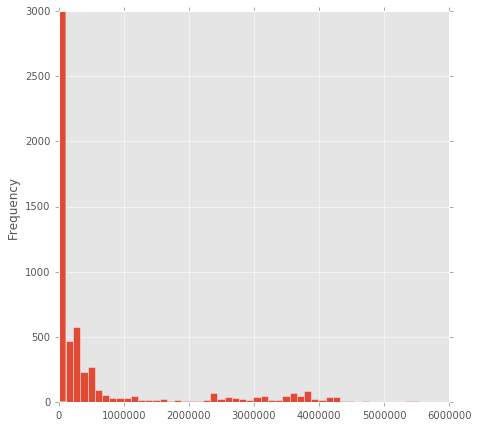

In [21]:
fig, ax = plt.subplots(figsize=(7,7))
df['complete_time 3'].plot.hist(bins=70, ax=ax)
ax.set_xlim((0,6000000))

(0, 3000)

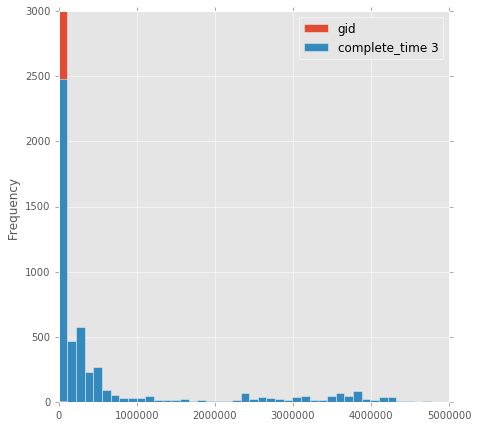

In [70]:
fig, ax = plt.subplots(figsize=(7,7))
df[df['complete_time 3'] != 1].plot.hist(bins=70, ax=ax)
ax.set_xlim((0,5000000))
ax.set_ylim((0,3000))

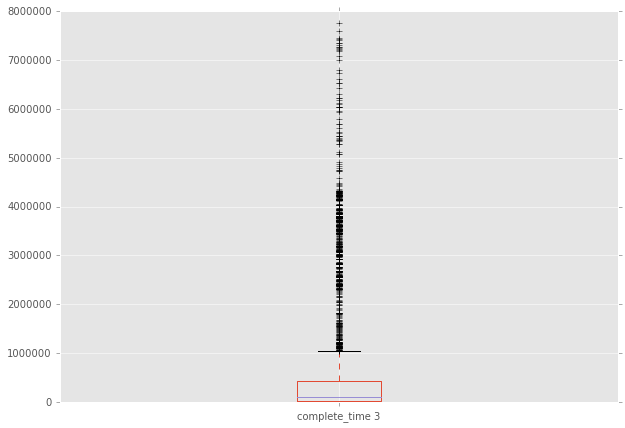

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
df['complete_time 3'].plot.box()

In [24]:
skew = df['complete_time 3'].skew()
kurtosis = df['complete_time 3'].kurtosis()
print("This data is highly positively skew:",skew, "and highly leptokurtic:", kurtosis,". An poses a large ammount of extreme values" )

This data is highly positively skew: 2.47142794503 and highly leptokurtic: 5.77084376097 . An poses a large ammount of extreme values


## This means that statistical analysis with this data set would be very imprecise. One reason might be the precense of 1 (means 0.0 seconds) and 2 (means 1.0 second) in the dataset. 

My hypohtesis failed, It is still skew and leptokurtic without 1 and 2.The presense of this type of data was only 9

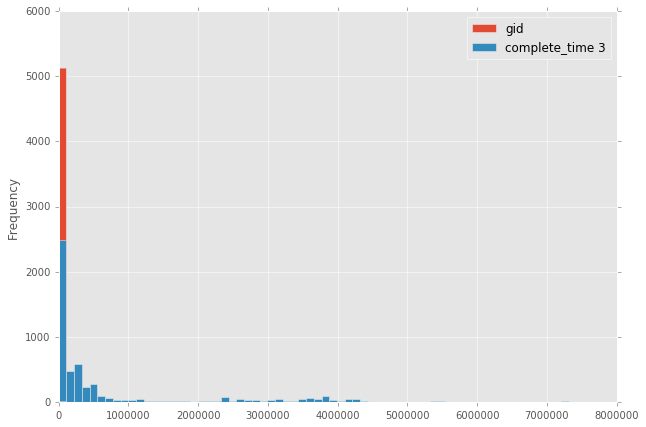

In [103]:
fig, ax = plt.subplots(figsize=(10,7))
df[df['complete_time 3'] > 2].plot.hist(bins=70, ax=ax)

In [121]:
prove = df[df['complete_time 3'] > 2]
outcome = ((df['complete_time 3'].count() - prove['complete_time 3'].count())/ df['complete_time 3'].count()) * 100

In [122]:
prove.describe()

,gid,Complete_time,Complete_time 2,complete_time 3
count,5126.000000,5126,5126,5.126000e+03
mean,2883.524385,7 days 07:20:49.819937,8 days 02:06:33.830862,6.987948e+05
std,1715.038011,15 days 01:31:58.931750,14 days 15:48:49.714517,1.266530e+06
min,1.000000,-19 days +09:29:00,0 days 00:00:55,5.600000e+01
25%,1364.250000,0 days 02:28:17.250000,0 days 16:21:41,5.890200e+04
50%,2845.500000,1 days 00:17:03.500000,1 days 12:45:06.500000,1.323075e+05
75%,4351.750000,4 days 23:15:45.500000,5 days 23:08:13.500000,5.152945e+05
max,5851.000000,89 days 18:54:00,89 days 18:54:00,7.757641e+06
